In [1]:
#libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/MyDrive/Data_Science/Data_Frames/Fertilizer/train.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Data_Science/Data_Frames/Fertilizer/test.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Data_Science/Data_Frames/Fertilizer/Fertilizer Prediction.csv')

train_df = data1.copy()
test_df = data2.copy()
additional_df = data3.copy()

print("First 3 rows of train_df: \n", train_df.head(3))
print("First 3 rows of test_df: \n", test_df.head(3))
print("First 3 rows of test_df: \n", additional_df.head(3))

First 3 rows of train_df: 
    id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
First 3 rows of test_df: 
        id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  
First 3 rows of test_df: 
    Temparature  Humi

In [4]:
#function to make the columns snake_case
import re

def to_snake_case(df):
    def convert(name):
        #lower case
        name = name.lower()
        # Replace spaces and hyphens with underscores
        name = re.sub(r'[\s\-]+', '_', name)
        # Add underscore before capital letters (except at the beginning)
        name = re.sub(r'(?<!^)(?=[A-Z])', '_', name)
        # Convert to lowercase
        return name.lower()

    df.columns = [convert(col) for col in df.columns]
    return df

In [5]:
to_snake_case(train_df)
to_snake_case(test_df)
to_snake_case(additional_df)

,temparature,humidity,moisture,soil_type,crop_type,nitrogen,potassium,phosphorous,fertilizer_name
0,32,51,41,Red,Ground Nuts,7,3,19,14-35-14
1,35,58,35,Black,Cotton,4,14,16,Urea
2,27,55,43,Sandy,Sugarcane,28,0,17,20-20
3,33,56,56,Loamy,Ground Nuts,37,5,24,28-28
4,32,70,60,Red,Ground Nuts,4,6,9,14-35-14
...,...,...,...,...,...,...,...,...,...
99995,32,71,61,Black,Tobacco,23,1,25,20-20
99996,35,72,47,Loamy,Millets,38,1,32,17-17-17
99997,28,50,61,Sandy,Maize,10,11,14,14-35-14
99998,29,57,63,Loamy,Ground Nuts,7,10,4,DAP


In [6]:
target_id = train_df['id']
train_df = train_df.drop(columns='id')

In [7]:
full_df = pd.concat([train_df, additional_df], ignore_index= True)

print("Dfs successfully concatenated", full_df.head())

Dfs successfully concatenated    temparature  humidity  moisture soil_type  crop_type  nitrogen  potassium  \
0           37        70        36    Clayey  Sugarcane        36          4   
1           27        69        65     Sandy    Millets        30          6   
2           29        63        32     Sandy    Millets        24         12   
3           35        62        54     Sandy     Barley        39         12   
4           35        58        43       Red      Paddy        37          2   

   phosphorous fertilizer_name  
0            5           28-28  
1           18           28-28  
2           16        17-17-17  
3            4        10-26-26  
4           16             DAP  


In [8]:
from sklearn.preprocessing import LabelEncoder

le_soil        = LabelEncoder().fit(full_df['soil_type'])
le_crop        = LabelEncoder().fit(full_df['crop_type'])
le_fertilizer  = LabelEncoder().fit(full_df['fertilizer_name'])  # target encoder

full_df['soil_type']      = le_soil.transform(full_df['soil_type'])
full_df['crop_type']      = le_crop.transform(full_df['crop_type'])
full_df['fertilizer_name'] = le_fertilizer.transform(full_df['fertilizer_name'])

In [9]:
test_df['soil_type']      = le_soil.transform(test_df['soil_type'])
test_df['crop_type']      = le_crop.transform(test_df['crop_type'])

In [10]:
full_df = full_df.rename(columns= {'temparature' : 'temperature'})
test_df = test_df.rename(columns={'temparature' : 'temperature'})

In [11]:
full_df['nutrient_index'] = full_df['nitrogen'] + full_df['phosphorous'] + full_df['potassium']
full_df['nutrient_moisture_ration'] = full_df['nutrient_index'] / (full_df['moisture'] + 1e-6)
full_df['climate_stress'] = (full_df['temperature'] - full_df['humidity']) / (full_df['temperature'] +1e-6)
full_df['climate_gap'] = abs(full_df['temperature'] - full_df['humidity'])
full_df['water_retention'] = full_df['moisture'] * full_df['humidity']
full_df['water_stress_index'] = full_df['temperature'] / (full_df['humidity'] + full_df['moisture'] + 1e-6)
full_df['temp_humidity'] = full_df['temperature'] * full_df['humidity']
full_df['temp_moisture'] = full_df['temperature'] * full_df['moisture']
full_df['np_ratio'] = full_df['nitrogen'] / (full_df['phosphorous'] + 1e-6)
full_df['nk_ratio'] = full_df['nitrogen'] / (full_df['potassium'] + 1e-6)
full_df['pk_ratio'] = full_df['phosphorous'] / (full_df['potassium'] + 1e-6)
full_df['total_npk'] = full_df['nitrogen'] + full_df['phosphorous'] + full_df['potassium']
full_df['n_proportion'] = full_df['nitrogen'] / (full_df['total_npk'] + 1e-6)
full_df['p_proportion'] = full_df['potassium'] / (full_df['total_npk'] + 1e-6)
full_df['k_proportion'] = full_df['potassium'] / (full_df['total_npk'] + 1e-6)

In [12]:
test_df['nutrient_index'] = test_df['nitrogen'] + test_df['phosphorous'] + test_df['potassium']
test_df['nutrient_moisture_ration'] = test_df['nutrient_index'] / (test_df['moisture'] + 1e-6)
test_df['climate_stress'] = (test_df['temperature'] - test_df['humidity']) / (test_df['temperature'] +1e-6)
test_df['climate_gap'] = abs(test_df['temperature'] - test_df['humidity'])
test_df['water_retention'] = test_df['moisture'] * test_df['humidity']
test_df['water_stress_index'] = test_df['temperature'] / (test_df['humidity'] + test_df['moisture'] + 1e-6)
test_df['temp_humidity'] = test_df['temperature'] * test_df['humidity']
test_df['temp_moisture'] = test_df['temperature'] * test_df['moisture']
test_df['np_ratio'] = test_df['nitrogen'] / (test_df['phosphorous'] + 1e-6)
test_df['nk_ratio'] = test_df['nitrogen'] / (test_df['potassium'] + 1e-6)
test_df['pk_ratio'] = test_df['phosphorous'] / (test_df['potassium'] + 1e-6)
test_df['total_npk'] = test_df['nitrogen'] + test_df['phosphorous'] + test_df['potassium']
test_df['n_proportion'] = test_df['nitrogen'] / (test_df['total_npk'] + 1e-6)
test_df['p_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)
test_df['k_proportion'] = test_df['potassium'] / (test_df['total_npk'] + 1e-6)

In [14]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 30.2 MB/s eta 0:00:00


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score

In [16]:
from sklearn.model_selection import train_test_split

X = full_df.drop(columns= 'fertilizer_name')
y = full_df['fertilizer_name']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [17]:
import optuna
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [18]:
def objective(trial):
    """Optuna objective function for hyperparameter optimization"""

    params = {
        'objective': 'multi:softprob',
        'num_class': len(np.unique(y_train)),
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0, 2),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 2),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 2),
        'random_state': 42,
        'use_label_encoder': False,
        'eval_metric': 'mlogloss',
        'tree_method': 'hist',
        'device': "cuda"
    }

    model = XGBClassifier(**params)

    cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='neg_log_loss')

    return np.median(cv_scores)


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

print("Best parameters:", study.best_params)
print("Best CV score:", study.best_value)

[I 2025-06-20 07:14:38,108] A new study created in memory with name: no-name-8ba3513b-78e0-4622-9999-dccd6e5b5770
[I 2025-06-20 07:15:03,699] Trial 0 finished with value: -1.939171265338536 and parameters: {'n_estimators': 353, 'max_depth': 3, 'learning_rate': 0.01257470484373321, 'subsample': 0.6176996598035135, 'colsample_bytree': 0.7641130798546435, 'min_child_weight': 10, 'gamma': 0.3759940232103365, 'reg_alpha': 1.1193030463594733, 'reg_lambda': 1.7689651171246565}. Best is trial 0 with value: -1.939171265338536.
[I 2025-06-20 07:15:26,386] Trial 1 finished with value: -1.935718599787887 and parameters: {'n_estimators': 129, 'max_depth': 7, 'learning_rate': 0.024655346715179462, 'subsample': 0.6076069682005069, 'colsample_bytree': 0.8513410197033787, 'min_child_weight': 6, 'gamma': 0.9097160247564087, 'reg_alpha': 0.4681904773431671, 'reg_lambda': 1.4819300761034537}. Best is trial 1 with value: -1.935718599787887.
[I 2025-06-20 07:18:06,485] Trial 2 finished with value: -1.929747

Best parameters: {'n_estimators': 295, 'max_depth': 7, 'learning_rate': 0.06674958748737672, 'subsample': 0.8263198958602636, 'colsample_bytree': 0.6489166096560716, 'min_child_weight': 9, 'gamma': 0.7942466326633388, 'reg_alpha': 1.301762228939459, 'reg_lambda': 1.8739182974702682}
Best CV score: -1.927421736928468


In [19]:
params = {'n_estimators': 295,
          'max_depth': 7,
          'learning_rate': 0.06674958748737672,
          'subsample': 0.8263198958602636,
          'colsample_bytree': 0.6489166096560716,
          'min_child_weight': 9,
          'gamma': 0.7942466326633388,
          'reg_alpha': 1.301762228939459,
          'reg_lambda': 1.8739182974702682,
          'random_state': 42,
          'tree_method': 'hist',
          'device': "cuda"
         }
best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_train, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_train, y_train)

Final CV scores: [-1.92742174 -1.92794296 -1.92713611]
Mean CV score: -1.9275 ± 0.0003


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6489166096560716, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.7942466326633388,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06674958748737672,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [20]:
X_submission = test_df.drop(columns='id')

y_pred_enc = best_model.predict(X_submission)

y_pred = le_fertilizer.inverse_transform(y_pred_enc)

submission_df = pd.DataFrame({
    'id' : test_df['id'],
    'Fertilizer Name' : y_pred
})

submission_df.to_csv("submission6.csv", index= False)

print("Success!")

Success!


In [21]:
submission_df

,id,Fertilizer Name
0,750000,DAP
1,750001,17-17-17
2,750002,10-26-26
3,750003,14-35-14
4,750004,20-20
...,...,...
249995,999995,14-35-14
249996,999996,14-35-14
249997,999997,DAP
249998,999998,DAP


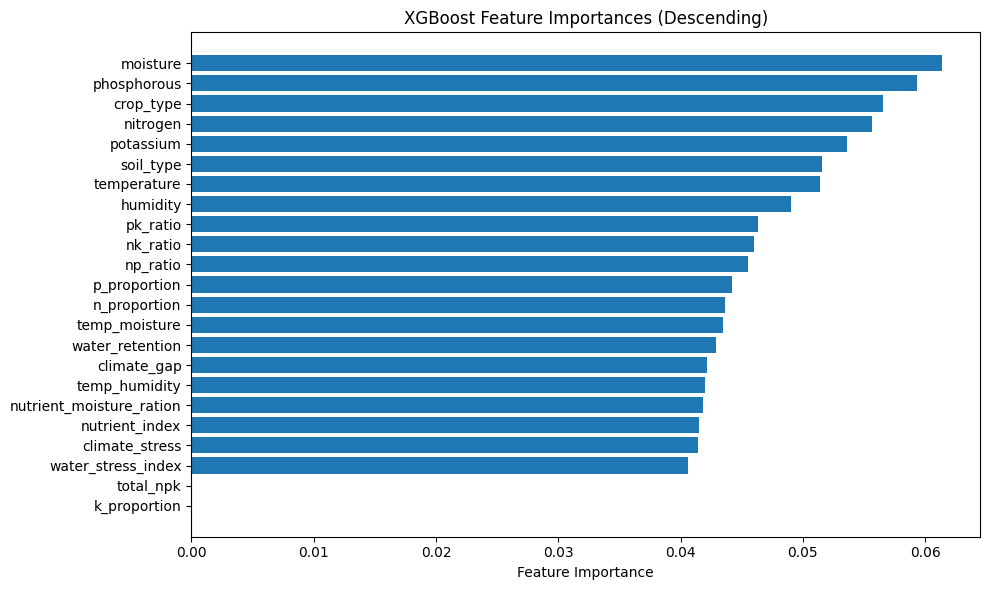

In [23]:
# Train XGBoost model
clf = XGBClassifier(
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss'
)
clf.fit(X_train, y_train)

# Get importances and feature names
importances = clf.feature_importances_
feature_names = X_train.columns

# Sort in descending order
sorted_idx = np.argsort(importances)[::-1]
sorted_importances = importances[sorted_idx]
sorted_features = feature_names[sorted_idx]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances)
plt.xlabel("Feature Importance")
plt.title("XGBoost Feature Importances (Descending)")
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()

In [26]:
top_features = ["moisture", "phosphorous", "crop_type", "nitrogen", "potassium",
    "soil_type", "temperature", "humidity"]

X_top = X_train[top_features]

X_validation_top = X_test[top_features]

In [31]:
model = XGBClassifier(**params)
model.fit(X_top, y_train)
y_pred = model.predict(X_validation_top)

print(f1_score(y_test, y_pred, average='weighted'))

0.19360782955114914


In [32]:
model = XGBClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f1_score(y_test, y_pred, average='weighted'))

0.1845421418018337


In [33]:
best_model = XGBClassifier(**params)
cv_res = cross_val_score(best_model, X_top, y_train, cv=3, scoring='neg_log_loss')

print(f"Final CV scores: {cv_res}")
print(f"Mean CV score: {cv_res.mean():.4f} ± {cv_res.std():.4f}")

best_model.fit(X_top, y_train)

Final CV scores: [-1.92052047 -1.92102516 -1.92065871]
Mean CV score: -1.9207 ± 0.0002


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6489166096560716, device='cuda',
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.7942466326633388,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.06674958748737672,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [39]:
test_df = test_df[top_features]

In [40]:
test_df

,moisture,phosphorous,crop_type,nitrogen,potassium,soil_type,temperature,humidity
0,52,24,10,34,11,4,31,70
1,45,15,8,30,14,3,27,62
2,28,4,2,14,15,1,28,72
3,57,36,2,18,17,0,37,53
4,32,14,7,13,19,3,31,55
...,...,...,...,...,...,...,...,...
249995,30,18,8,14,7,3,26,66
249996,55,7,7,28,14,3,33,62
249997,64,27,6,28,11,0,36,53
249998,26,10,6,33,0,1,36,67


In [42]:
X_submission = test_df.copy()

y_pred_enc = best_model.predict(X_submission)

y_pred = le_fertilizer.inverse_transform(y_pred_enc)

submission_df = pd.DataFrame({
    'id' : data2['id'],
    'Fertilizer Name' : y_pred
})

submission_df.to_csv("submission7.csv", index= False)

print("Success!")

Success!
